# Time Series Stock Forecast

In [17]:
# load required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
import yfinance as yf
from pandas_datareader import data as pdr

In [18]:
stock = 'WMT'
start = '2017-01-01' 
end = '2020-3-19'
df = pdr.get_data_yahoo(stock, start, end)

In [19]:
df.shape

(808, 6)

In [20]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,69.239998,68.050003,69.239998,68.660004,10473200.0,63.797958
2017-01-04,69.629997,68.599998,68.660004,69.059998,7918000.0,64.169632
2017-01-05,69.330002,68.120003,68.430000,69.209999,7099200.0,64.308998
2017-01-06,68.500000,68.010002,68.410004,68.260002,9491100.0,63.426285
2017-01-09,68.800003,68.320000,68.330002,68.709999,8685200.0,63.844418


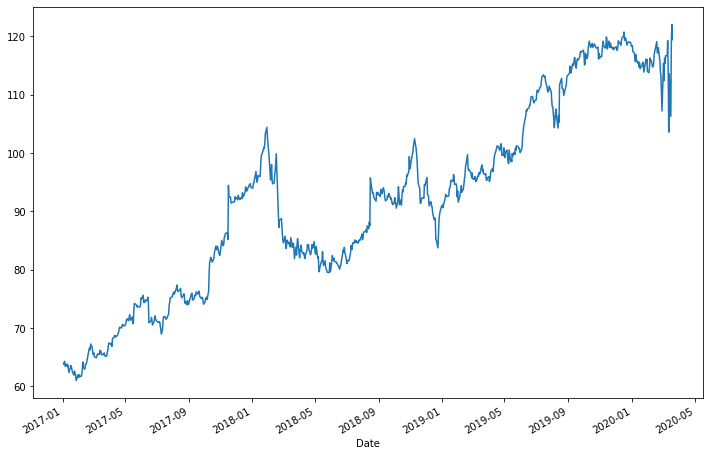

In [21]:
df['Adj Close'].plot(figsize=(12,8))
plt.show()

In [22]:
df = df.reset_index().rename(columns={'Date':'ds', 'Adj Close':'y'})
#df['ds'] = pd.to_datetime(df.index)
#df['y'] = pd.DataFrame(df['Adj Close'])

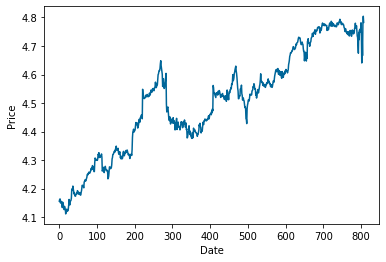

In [23]:
# Log Transform Data
df['y'] = pd.DataFrame(np.log(df['y']))

# plot data
ax = df['y'].plot(color='#006699');
ax.set_ylabel('Price');
ax.set_xlabel('Date');
plt.show()

In [24]:
# train test split
df_train = df[:740]
df_test = df[740:]

In [25]:
# Model Fitting
# instantiate the Prophet class
mdl = Prophet(interval_width=0.95, daily_seasonality=True)
 
# fit the model on the training data
mdl.fit(df_train)
 
# define future time frame
future = mdl.make_future_dataframe(periods=24, freq='MS')

In [26]:
# instantiate the Prophet class
mdl = Prophet(interval_width=0.95, daily_seasonality=True)
 
# fit the model on the training data
mdl.fit(df_train)
 
# define future time frame
future = mdl.make_future_dataframe(periods=24, freq='MS')

In [27]:
# generate the forecast
forecast = mdl.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
759,2021-08-01,5.119612,1.774072,8.418717
760,2021-09-01,5.157112,1.551151,8.731135
761,2021-10-01,5.162295,1.422995,8.924241
762,2021-11-01,5.200362,1.236712,9.213196
763,2021-12-01,5.191049,0.837475,9.443328


In [28]:
forecast['yhat_lower'].head()

0    4.085510
1    4.088251
2    4.096954
3    4.093563
4    4.097987
Name: yhat_lower, dtype: float64

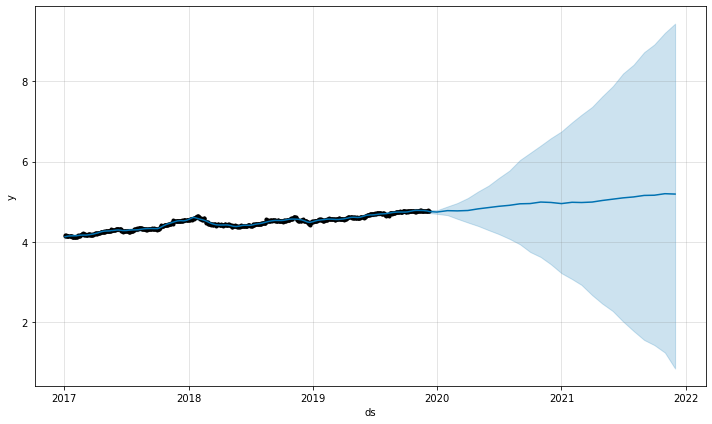

In [29]:
mdl.plot(forecast);
plt.show()

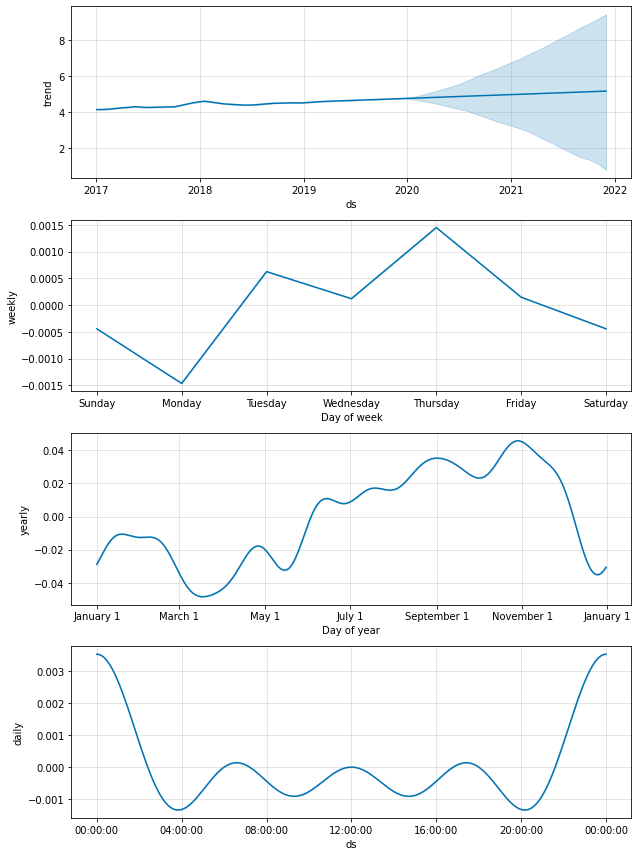

In [30]:
# plot time series components
mdl.plot_components(forecast)
plt.show()

In [31]:
import math
# retransform using e
y_hat = np.exp(forecast['yhat'][740:])
y_true = np.exp(df['y'])
 
# compute the mean square error
mse = ((y_hat - y_true) ** 2).mean()
print('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))

Prediction quality: 1219.30 MSE (34.92 RMSE)


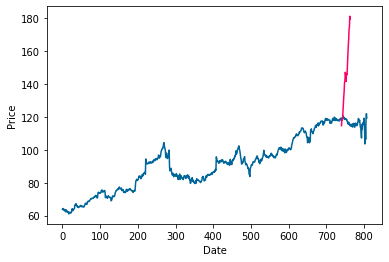

In [32]:
plt.plot(y_true, label='Original', color='#006699');
plt.plot(y_hat, color='#ff0066', label='Forecast');
plt.ylabel('Price');
plt.xlabel('Date');
plt.show()